In [1]:
import numpy as np

In [2]:
#1.

def LUdecomp(aa):
    a = aa.copy()
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a



def LUsolve(aa,bb):
    a = aa.copy()
    b = bb.copy()
    n = len(a)
    for k in range(0,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b


In [3]:
A = np.array([[  6,  2,  0,  0,  0],
              [ -1,  7,  2,  0,  0],
              [  0, -2,  8,  2,  0],
              [  0,  0,  3,  7, -2],
              [  0,  0,  0,  3,  5]], dtype = float)
b1= np.array([  1,  0,  0,  0,  0], dtype = float)
b2= np.array([  0,  1,  0,  0,  0], dtype = float)
b3= np.array([  0,  0,  1,  0,  0], dtype = float)
b4= np.array([  0,  0,  0,  1,  0], dtype = float)
b5= np.array([  0,  0,  0,  0,  1], dtype = float)

In [4]:
LU = LUdecomp(A)

In [5]:
x1 = LUsolve(LU,b1)
x2 = LUsolve(LU,b2)
x3 = LUsolve(LU,b3)
x4 = LUsolve(LU,b4)
x5 = LUsolve(LU,b5)

print(np.array([x1,x2,x3,x4,x5]).T)
print(np.linalg.inv(A))
# These two results are equal.

[[ 0.15961975 -0.0422815   0.01163451 -0.00283768 -0.00113507]
 [ 0.02114075  0.12684449 -0.03490352  0.00851305  0.00340522]
 [ 0.00581725  0.03490352  0.12797957 -0.03121453 -0.01248581]
 [-0.00212826 -0.01276958 -0.04682179  0.13337117  0.05334847]
 [ 0.00127696  0.00766175  0.02809308 -0.0800227   0.16799092]]
[[ 0.15961975 -0.0422815   0.01163451 -0.00283768 -0.00113507]
 [ 0.02114075  0.12684449 -0.03490352  0.00851305  0.00340522]
 [ 0.00581725  0.03490352  0.12797957 -0.03121453 -0.01248581]
 [-0.00212826 -0.01276958 -0.04682179  0.13337117  0.05334847]
 [ 0.00127696  0.00766175  0.02809308 -0.0800227   0.16799092]]


In [6]:
#2.

def LUdecomp3(cc,dd,ee):
    c = cc.copy()
    d = dd.copy()
    e = ee.copy()
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c,d,e

def LUsolve3(cc,dd,ee,bb):
    c, d, e, b = cc.copy(), dd.copy(), ee.copy(), bb.copy()
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b


In [7]:
def maketridiag(n):
    c = np.ones(n-1)*(-1)
    d = np.ones(n)*4
    e = np.ones(n-1)*(-1)
    b = np.zeros(n)
    b[0] = 9
    b[1:n] = 5
    A = np.diag(c,k=-1) + np.diag(d) + np.diag(e,k=1)
    return [c,d,e,A,b]


In [8]:
P = maketridiag(8)
Q = maketridiag(10)
R = maketridiag(12)

In [9]:
c,d,e = LUdecomp3(P[0],P[1],P[2])
print('n = 8 : ',LUsolve3(c,d,e,P[4]))

c,d,e = LUdecomp3(Q[0],Q[1],Q[2])
print('n = 10 : ',LUsolve3(c,d,e,Q[4]))

c,d,e = LUdecomp3(R[0],R[1],R[2])
print('n = 12 : ',LUsolve3(c,d,e,R[4]))

n = 8 :  [2.90186213 2.60744851 2.52793193 2.5042792  2.48918486 2.45246023
 2.32065606 1.83016402]
n = 10 :  [2.90191936 2.60767745 2.52879042 2.50748425 2.50114659 2.4971021
 2.48726181 2.45194513 2.3205187  1.83012968]
n = 12 :  [2.90192347 2.60769388 2.52885206 2.50771437 2.5020054  2.50030723
 2.49922351 2.49658681 2.48712374 2.45190814 2.32050884 1.83012721]


In [10]:
from time import time

S = maketridiag(5000)

s1 = time()
LU = LUdecomp(S[3])
x1 = LUsolve(LU,S[4])
f1 = time()
t1 = f1-s1

s2 = time()
c,d,e = LUdecomp3(S[0],S[1],S[2])
x2 = LUsolve3(c,d,e,S[4])
f2 = time()
t2 = f2-s2

print('Doolittle - ',t1, ', tridiagonal - ',t2)

Doolittle -  4.953749656677246 , tridiagonal -  0.01302647590637207


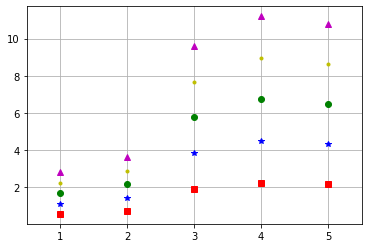

In [11]:
#3

import matplotlib.pyplot as plt
k = 2.5 #N/m
W = np.ones(5)
K = np.array([[  2, -1,  0,  0,  0],
              [ -1,  4, -1,  0,  0],
              [  0, -1,  4, -1, -2],
              [  0,  0, -1,  2, -1],
              [  0,  0, -2, -1,  3]], dtype = float)
def X(n):
    return np.linalg.solve(K,n*W/k)
n = np.array([1,2,3,4,5])
plt.xlim(0.5,5.5)
plt.grid(True)
plt.plot(n,X(1)[n-1],'rs')
plt.plot(n,X(2)[n-1],'b*')
plt.plot(n,X(3)[n-1],'go')
plt.plot(n,X(4)[n-1],'y.')
plt.plot(n,X(5)[n-1],'m^')